# Importing Packages 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Read & Analyse Data 

In [2]:
df = pd.read_csv(r'Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Read & Analyse Data 

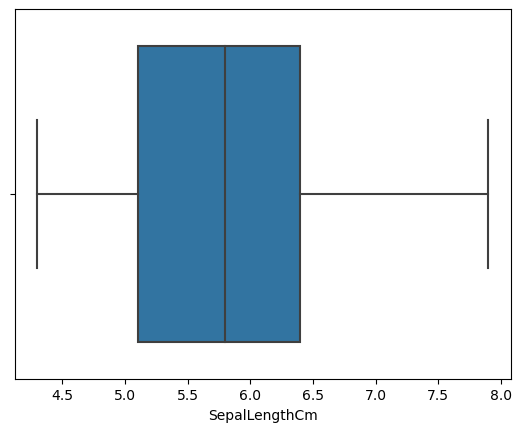

In [6]:
sns.boxplot(data = df , x = 'SepalLengthCm');

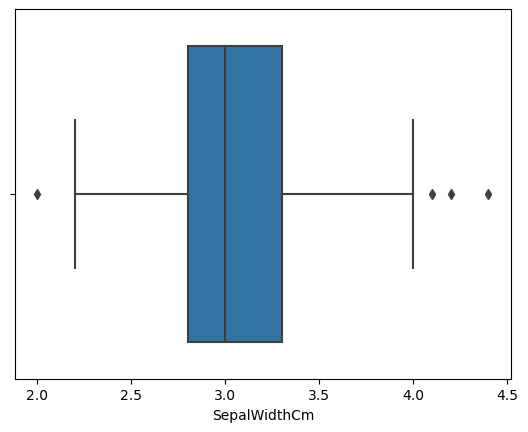

In [7]:
sns.boxplot(data = df , x = 'SepalWidthCm');

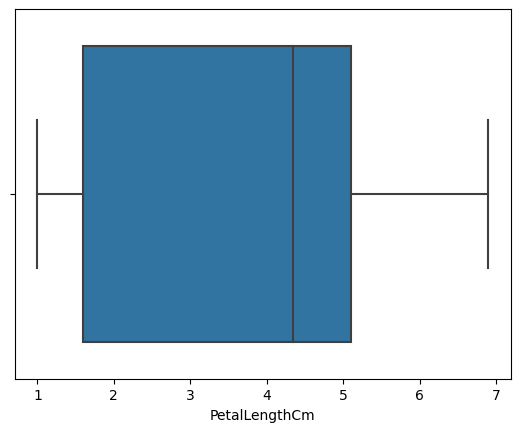

In [8]:
sns.boxplot(data = df , x = 'PetalLengthCm');

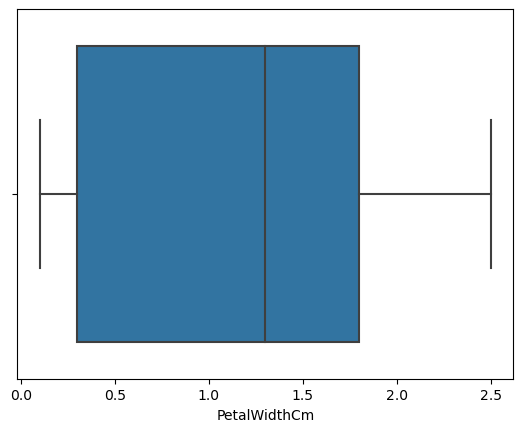

In [9]:
sns.boxplot(data = df , x = 'PetalWidthCm');

In [10]:
X = df.iloc[:, 1:5].values

# Define the range of cluster numbers to evaluate

In [13]:
clusters_range = range(2, 11)
wcss_scores = []  # WCSS scores
silhouette_scores = []  # Silhouette scores

# Perform clustering and calculate silhouette score for each number of clusters

In [14]:
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate WCSS
    wcss = kmeans.inertia_
    wcss_scores.append(wcss)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette and WCSS Scores

Silhouette Score

The silhouette score is a metric used to assess the quality of clustering results. It measures how well each data point in a cluster is assigned to that cluster compared to other clusters. The silhouette score ranges from -1 to 1, where higher values indicate better clustering results.

To calculate the silhouette score for a data point, we consider two measures:

1-Cohesion (a): The average distance between the data point and other points within the same cluster. We want this value to be as small as possible, indicating that the data point is tightly grouped with its cluster members.

2-Separation (b): The average distance between the data point and points in the nearest neighboring cluster. We want this value to be as large as possible, indicating that the data point is well-separated from other clusters.

The silhouette score (s) for a data point is given by the formula:

s = (b - a) / max(a, b)

The overall silhouette score for a clustering result is the average silhouette score across all data points in the dataset.

Interpreting the silhouette score:

A score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters, suggesting a good clustering result.
A score close to 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
A score close to -1 suggests that the data point may have been assigned to the wrong cluster.

Within-Cluster Sum of Squares

WCSS stands for Within-Cluster Sum of Squares. It is a measure used to evaluate the quality of a clustering algorithm, particularly in the case of K-means clustering. WCSS represents the sum of the squared Euclidean distances between each data point and the centroid of its assigned cluster.

The goal of K-means clustering is to minimize the WCSS value. A lower WCSS indicates that the data points within each cluster are closer to their respective cluster centroids, suggesting a more compact and well-separated clustering solution.

Mathematically, WCSS can be calculated as follows:

WCSS = Σ(d(xi, ci))^2

Where:

xi represents a data point
ci represents the centroid of the cluster to which xi is assigned
d(xi, ci) represents the Euclidean distance between xi and ci

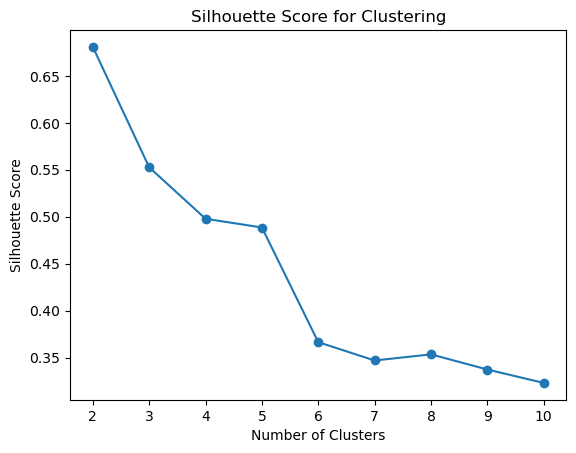

In [15]:
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Clustering')
plt.show()

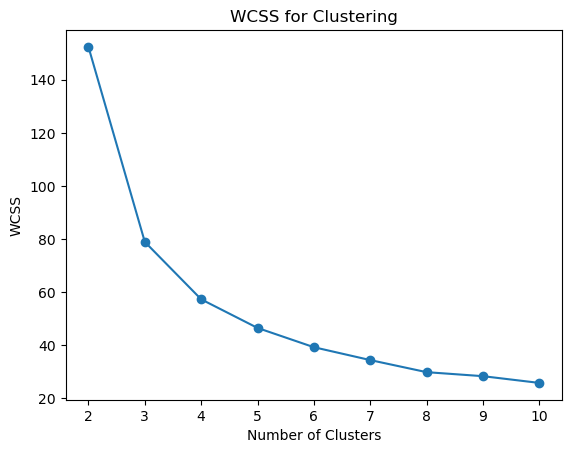

In [16]:
plt.plot(list(clusters_range), wcss_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS for Clustering')
plt.show()

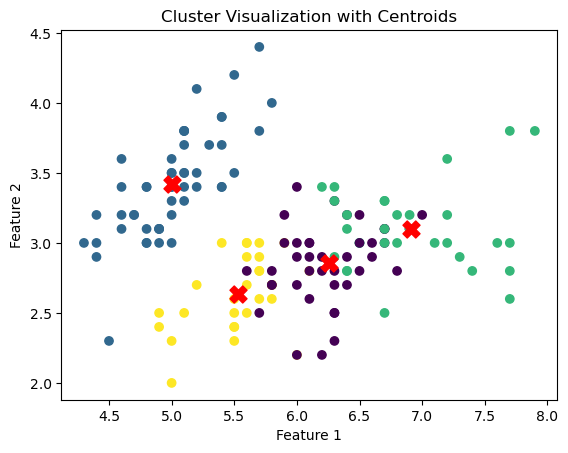

In [21]:
kmeans = KMeans(n_clusters=4)  
cluster_labels = kmeans.fit_predict(X)  
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=150)  # Plot centroids in red
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization with Centroids')
plt.show()